# Machine learning for Public Policy
## HW2

## Takuya Ando

### The functions in machine learning pipeline file are as below.

In [10]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


def read_data(file_path):
    return pd.read_csv(file_path)


def describe(df):
    return df.describe()


def plot(X, df, drop_lst):
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(17,20))
    for x in X:
        ind, row, col = x
        attr = df.drop(drop_lst, axis=1).columns[ind]
        if attr == 'age' or attr == 'NumberOfOpenCreditLinesAndLoans':
            axes[row, col].hist(df[attr], bins=10)
        else:
            axes[row, col].hist(df[attr], bins=10, log=True)
        axes[row, col].set_title(attr)
    plt.show()


def pre_process(df):
    fill_dic = {}
    for i, val in df.isnull().any().items():
        if val == True:
            fill_dic[i] = np.nanmean(df[i])
    return df.fillna(fill_dic)


def descretize(df, attr, col_name, num_bin, label_lst):
    df2 = pd.qcut(df[attr], num_bin, labels=label_lst)
    df[col_name] = df2
    return df


def make_dummy(df, col_lst):
    df = pd.get_dummies(df, dummy_na=False, drop_first=True, columns = col_lst)
    return df


def build_classifier(df, drop_vars, target_label):
    X = df.drop(drop_vars, axis=1)
    Y = df[target_label]
    Y = np.ravel(Y)
    (x_train, x_test, y_train, y_test) = train_test_split(X, Y)
    log_model = LogisticRegression(random_state=0) 
    return log_model.fit(x_train, y_train), x_test, y_test


def evaluate_model(model, x_test, y_test):
    class_predict = model.predict(x_test) 
    return metrics.accuracy_score(y_test, class_predict)

#### We also use parameters as below. 

In [29]:
file_path = "credit-data.csv"

drop_lst = ["PersonID","SeriousDlqin2yrs","zipcode"]

X = [(0, 0, 0),(1, 0, 1), (2, 0, 2), (3, 1, 0), (4, 1, 1), (5, 1, 2), (6, 2, 0), (7, 2, 1), (8, 2, 2), (9, 3, 0)]

attr = "age"

num_bin = 3

label_lst = ["young", "middle", "elderly"]

col_name = "age_cat"

col_lst = ["age_cat"]

drop_vars = ["PersonID", "SeriousDlqin2yrs", "age", "zipcode", "age_cat_middle", "age_cat_elderly"]

target_label = "SeriousDlqin2yrs"

### Read the data into dataframe.

In [23]:
df = mlpipeline.read_data(file_path)
describe(df)

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,41016.000000,41016.000000,41016.00000,41016.000000,41016.000000,41016.000000,41016.000000,3.304200e+04,41016.000000,41016.000000,41016.000000,41016.000000,39979.000000
mean,115800.154598,0.161400,6.37587,51.683489,60623.824166,0.589233,331.458137,6.578996e+03,8.403477,0.419592,1.008801,0.371587,0.773231
std,28112.723511,0.367904,221.61895,14.746880,11.984357,5.205628,1296.109695,1.344683e+04,5.207324,5.190382,1.153826,5.169641,1.121269
min,22.000000,0.000000,0.00000,21.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106539.750000,0.000000,0.03431,41.000000,60618.000000,0.000000,0.176375,3.333000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,119901.500000,0.000000,0.18973,51.000000,60625.000000,0.000000,0.369736,5.250000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,134698.250000,0.000000,0.66716,62.000000,60629.000000,0.000000,0.866471,8.055750e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149999.000000,1.000000,22000.00000,109.000000,60644.000000,98.000000,106885.000000,1.794060e+06,56.000000,98.000000,32.000000,98.000000,13.000000


### Then, make the histogram for each valuable. I used log scale for other than age and number of open credit lines. We can see that some variables have outlier.

C:\Users\tando\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\tando\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


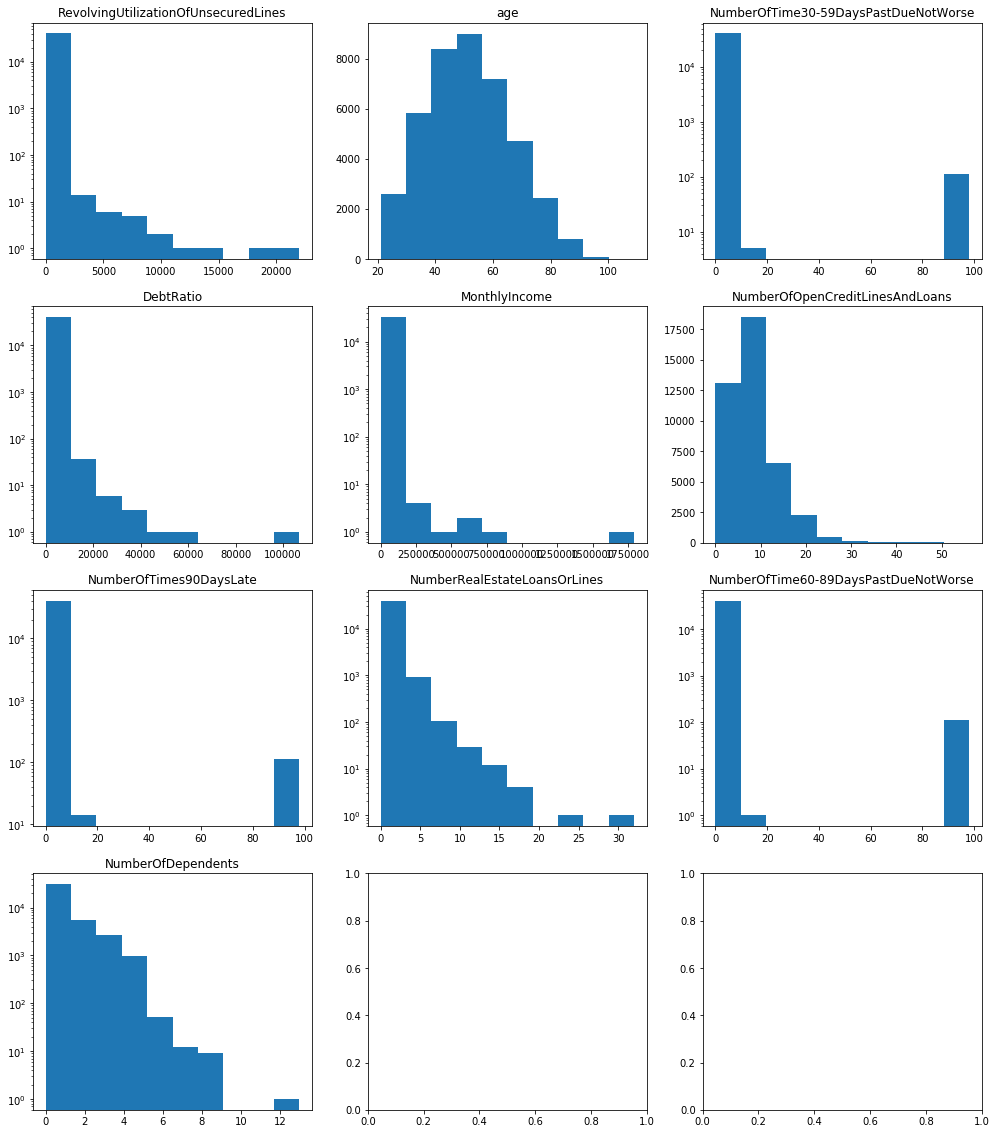

In [24]:
drop_lst = ["PersonID","SeriousDlqin2yrs","zipcode"]
X = [(0, 0, 0),(1, 0, 1), (2, 0, 2), (3, 1, 0), (4, 1, 1), (5, 1, 2), (6, 2, 0), (7, 2, 1), (8, 2, 2), (9, 3, 0)]

plot(X, df, drop_lst)

### Descritize the "age" variable into three categories, "young", "middle", "elderly".

In [26]:
df = pre_process(df)
df = descretize(df, attr, col_name, num_bin, label_lst)
df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_cat
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0,middle
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0,elderly
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0,middle
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0,middle
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0,middle


### Then, make binary variables from age category variable I made above. It is excluding the first dummy("young").

In [27]:
df = make_dummy(df, col_lst)
df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_cat_middle,age_cat_elderly
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0,1,0
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0,0,1
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0,1,0
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0,1,0
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0,1,0


### Finally, construct logistic regression model based on the processed and binarized data. I used accuracy for validation of model. The results of the test shows the model has accuracy score of around 85%.

In [28]:
(log_model, x_test, y_test) = mlpipeline.build_classifier(df, drop_vars, target_label)

print("model_accuracy:" + str(evaluate_model(log_model, x_test, y_test)))

C:\Users\tando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


model_accuracy:0.8542032377608738


#### We can also see the result above by running codes below.

In [ ]:
%run -i mlpipeline.py

In [ ]:
%run -i usepipeline.py